In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

!pip install japanize_matplotlib
!pip install tabulate
import japanize_matplotlib

from matplotlib import colors as mcolors
mcolors.TABLEAU_COLORS # dict型

import glob
import zipfile

#グローバル変数
target_col = "生死"
FIG_SERIAL_NUM = 1 # 表、グラフ等の図のシリアル番号

color = {'tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan'}

In [106]:
def data_init():
    train = pd.read_csv("/kaggle/input/titanic/train.csv")
    test = pd.read_csv("/kaggle/input/titanic/test.csv")

    train = train.rename(columns={'Survived': '生死',
                                'PassengerId': '乗客ID',
                               'Pclass':'チケットクラス',
                                'Name':'乗客名',
                                'Sex':'性別',
                                'Age':'年齢',
                                'SibSp':'兄弟、配偶者の数',
                                'Parch':'親、子供の数',
                                'Ticket':'チケット番号',
                                'Fare':'乗船料',
                                'Cabin':'キャビン番号',
                                'Embarked':'乗船港',
                               })

    test = test.rename(columns={
                                'PassengerId': '乗客ID',
                               'Pclass':'チケットクラス',
                                'Name':'乗客名',
                                'Sex':'性別',
                                'Age':'年齢',
                                'SibSp':'兄弟、配偶者の数',
                                'Parch':'親、子供の数',
                                'Ticket':'チケット番号',
                                'Fare':'乗船料',
                                'Cabin':'キャビン番号',
                                'Embarked':'乗船港',
                               })
    return train, test

train_eda, test_eda = data_init()
train_eda.head()
#test_eda.head()

,乗客ID,生死,チケットクラス,乗客名,性別,年齢,兄弟、配偶者の数,親、子供の数,チケット番号,乗船料,キャビン番号,乗船港
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
cols = train_eda.columns
cols
#type(cols) #Index

Index(['乗客ID', '生死', 'チケットクラス', '乗客名', '性別', '年齢', '兄弟、配偶者の数', '親、子供の数',
       'チケット番号', '乗船料', 'キャビン番号', '乗船港'],
      dtype='object')

In [108]:
'''
dic = {
    "PassengerId":"乗客のユニークID ",
    "Survived":"乗客の生死. 0 = 死亡, 1 = 生存",
    "Pclass":"チケットのクラス. 1等席~3等席",
    "Name":"乗客名",
    "Sex":"性別.male or female",
    "Age":"年齢",
    "Sibsp(同乗の兄弟、配偶者の数)":"同乗の兄弟姉妹、配偶者の人数",
    "Parch":"同乗の親、子供の人数",
    "Ticket":"チケット番号",
    "Fare":"乗船料",
    "Cabin":"キャビン番号",
    "Embarked":"乗客が乗船した港."
}
'''
dic = {
    '乗客ID':"乗客のユニークID ",
    '生死':"乗客の生死. 0 = 死亡, 1 = 生存",
    'チケットクラス':"チケットのクラス. 1等席~3等席",
    '乗客名':"乗客名",
    '性別':"male or female",
    '年齢':"年齢",
    '兄弟、配偶者の数':"同乗の兄弟姉妹、配偶者の人数",
    "親、子供の数":"同乗の親、子供の人数",
    "チケット番号":"チケット番号",
    '乗船料':"乗船料",
    'キャビン番号':"キャビン番号",
    '乗船港':"乗客が乗船した港"
}


dic

{'乗客ID': '乗客のユニークID ',
 '生死': '乗客の生死. 0 = 死亡, 1 = 生存',
 'チケットクラス': 'チケットのクラス. 1等席~3等席',
 '乗客名': '乗客名',
 '性別': 'male or female',
 '年齢': '年齢',
 '兄弟、配偶者の数': '同乗の兄弟姉妹、配偶者の人数',
 '親、子供の数': '同乗の親、子供の人数',
 'チケット番号': 'チケット番号',
 '乗船料': '乗船料',
 'キャビン番号': 'キャビン番号',
 '乗船港': '乗客が乗船した港'}

In [109]:
def iput_data_summary (data_df, header_info_dic, output_data_head_fname = "data_head.csv",output_col_info_fname = "col_info.csv",f_encode = "utf-8"):
    col_info_df = pd.DataFrame(dic.values(),index=dic.keys())
    col_info_df = col_info_df.rename(columns={0: 'カラム概要'})
    
    total_record_count = data_df.shape[0]
    
    unique_num_list = []
    null_record_count_list = []
    loss_data_rate_list = []
    min_list = []
    mean_list = []
    max_list = []
    for index, row in col_info_df.iterrows():
        #print(index)
        d_type = str(data_df[index].dtype)
        #print("--d_type : ", d_type)
        
        unique_num_list.append(data_df[index].unique().size)
        null_record_count = data_df[index].isnull().sum()
        null_record_count_list.append(null_record_count)
        loss_data_rate_list.append(round((null_record_count / total_record_count),3) ) 
        if d_type != "object" :
            mean_list.append(round(data_df[index].mean(),2))
            min_list.append(round(data_df[index].min(),2))
            max_list.append(round(data_df[index].max(),2))
        else :
            mean_list.append(None)
            min_list.append(None)
            max_list.append(None)
            
    
    col_info_df["レコード数"] = total_record_count
    col_info_df["ユニーク数"] = unique_num_list
    col_info_df["欠損(null)数"] = null_record_count_list
    col_info_df["欠損率"] = loss_data_rate_list
    col_info_df["データ型"] = data_df.dtypes
    col_info_df["最小値"] = min_list
    col_info_df["平均"] = mean_list
    col_info_df["最大値"] = max_list
    
    data_df.head(3).to_csv(output_data_head_fname, index=False,encoding=f_encode)
    
    col_info_df.reset_index(inplace= True)
    col_info_df = col_info_df.rename(columns={'index': 'カラム名'})
    col_info_df.to_csv(output_col_info_fname, index=False,encoding=f_encode)
    #print(col_info_df)
    return col_info_df

In [110]:
col_info_summary = iput_data_summary(data_df=train_eda, header_info_dic=dic)

col_info_summary

,カラム名,カラム概要,レコード数,ユニーク数,欠損(null)数,欠損率,データ型,最小値,平均,最大値
0,乗客ID,乗客のユニークID,891,891,0,0.000,int64,1.00,446.00,891.00
1,生死,"乗客の生死. 0 = 死亡, 1 = 生存",891,2,0,0.000,int64,0.00,0.38,1.00
2,チケットクラス,チケットのクラス. 1等席~3等席,891,3,0,0.000,int64,1.00,2.31,3.00
3,乗客名,乗客名,891,891,0,0.000,object,NaN,NaN,NaN
4,性別,male or female,891,2,0,0.000,object,NaN,NaN,NaN
5,年齢,年齢,891,89,177,0.199,float64,0.42,29.70,80.00
6,兄弟、配偶者の数,同乗の兄弟姉妹、配偶者の人数,891,7,0,0.000,int64,0.00,0.52,8.00
7,親、子供の数,同乗の親、子供の人数,891,7,0,0.000,int64,0.00,0.38,6.00
8,チケット番号,チケット番号,891,681,0,0.000,object,NaN,NaN,NaN
9,乗船料,乗船料,891,248,0,0.000,float64,0.00,32.20,512.33


In [111]:
test_eda["生死"] = None #目的
test_col_info_summary = iput_data_summary(data_df=test_eda, 
                                          header_info_dic=dic,
                                         output_col_info_fname = "test_col_info.csv")

test_col_info_summary

,カラム名,カラム概要,レコード数,ユニーク数,欠損(null)数,欠損率,データ型,最小値,平均,最大値
0,乗客ID,乗客のユニークID,418,418,0,0.000,int64,892.00,1100.50,1309.00
1,生死,"乗客の生死. 0 = 死亡, 1 = 生存",418,1,418,1.000,object,NaN,NaN,NaN
2,チケットクラス,チケットのクラス. 1等席~3等席,418,3,0,0.000,int64,1.00,2.27,3.00
3,乗客名,乗客名,418,418,0,0.000,object,NaN,NaN,NaN
4,性別,male or female,418,2,0,0.000,object,NaN,NaN,NaN
5,年齢,年齢,418,80,86,0.206,float64,0.17,30.27,76.00
6,兄弟、配偶者の数,同乗の兄弟姉妹、配偶者の人数,418,7,0,0.000,int64,0.00,0.45,8.00
7,親、子供の数,同乗の親、子供の人数,418,8,0,0.000,int64,0.00,0.39,9.00
8,チケット番号,チケット番号,418,363,0,0.000,object,NaN,NaN,NaN
9,乗船料,乗船料,418,170,1,0.002,float64,0.00,35.63,512.33


# 1変数

- hist (分布、正規分布?)
- 箱ひげ図 (外れ値)

In [112]:
train_eda.describe()

,乗客ID,生死,チケットクラス,年齢,兄弟、配偶者の数,親、子供の数,乗船料
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
train_eda.astype("str").describe()

,乗客ID,生死,チケットクラス,乗客名,性別,年齢,兄弟、配偶者の数,親、子供の数,チケット番号,乗船料,キャビン番号,乗船港
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,891,2,3,891,2,89,7,7,681,248,148,4
top,1,0,3,"Braund, Mr. Owen Harris",male,nan,0,0,347082,8.05,nan,S
freq,1,549,491,1,577,177,608,678,7,43,687,644


In [114]:
# グラフ用：意味変換
train_eda["生死"] = train["生死"].apply(lambda x: "生存" if x == 1 else "死亡").astype(str)
train_eda["性別"] = train["性別"].apply(lambda x: "男" if x == "male" else "女").astype(str)
train_eda.head()

,乗客ID,生死,チケットクラス,乗客名,性別,年齢,兄弟、配偶者の数,親、子供の数,チケット番号,乗船料,キャビン番号,乗船港
0,1,死亡,3,"Braund, Mr. Owen Harris",男,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,生存,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",女,38.0,1,0,PC 17599,71.2833,C85,C
2,3,生存,3,"Heikkinen, Miss. Laina",女,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,生存,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",女,35.0,1,0,113803,53.1000,C123,S
4,5,死亡,3,"Allen, Mr. William Henry",男,35.0,0,0,373450,8.0500,NaN,S


In [115]:
def print_pie_graph(df, target_column):
    labels = df[target_column].value_counts(ascending=False, normalize=False).index
    vals = df[target_column].value_counts(ascending=False, normalize=False).values

    #print("labels:",labels)
    n = len(df)
    title ="(N: " + str(n) + ") " +target_column
    plt.title(title)
    plt.axis("equal")
    #plt.legend() #凡例

    plt.pie(vals,labels=labels,autopct="%1.1f%%",startangle=90,
            counterclock=False,colors=mcolors.TABLEAU_COLORS)
    fname=target_column+"_pie_graph"+".png"
    #plt.tight_layout()
    plt.savefig(fname=fname) # 画像を保存する場合
    plt.show()

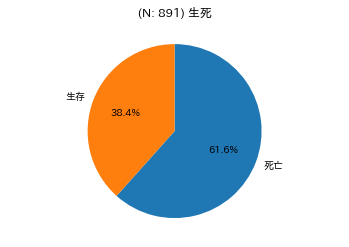

In [116]:
#目的変数の分布・割合
print_pie_graph(train_eda,target_col)

### 1変数(質的データ)

In [117]:
str_col = col_info_summary[col_info_summary["データ型"]=="object"]
str_col_series = str_col["カラム名"]
str_col_series

3        乗客名
4         性別
8     チケット番号
10    キャビン番号
11       乗船港
Name: カラム名, dtype: object

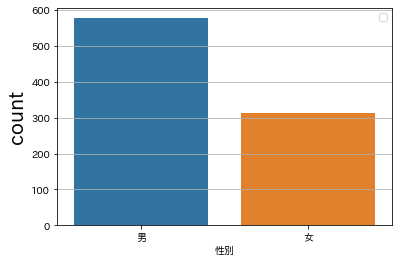

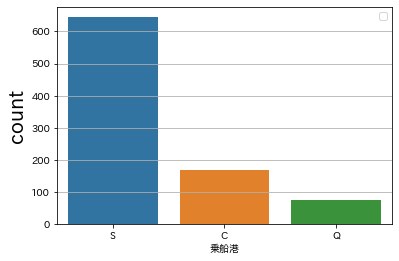

In [118]:
#str_col_series.drop([3,8]) # 乗客名、チケット番号は除外

for col in str_col_series.drop([3,8,10]):
    #print(col)
    title = "1variable_category_"+col+"_hist"
    fname=title+".png"
    #plt.xlabel(col, fontsize=20) #x軸ラベル
    plt.ylabel("Count", fontsize=20)#y軸ラベル
    plt.grid(True)      # 目盛線の表示
    #plt.title(col, fontsize=20)  # タイトル
    plt.legend()
    #sns.countplot(col,data=train_eda,color=mcolors.TABLEAU_COLORS) #error
    sns.countplot(col,data=train_eda)
    plt.savefig(fname)
    plt.show()
    

### 1変数(量的データ)

In [119]:
col_info_summary = iput_data_summary(data_df=train_eda, header_info_dic=dic)


numerical_col = col_info_summary[col_info_summary["データ型"]!="object"]
numerical_col_series = numerical_col["カラム名"]
numerical_col_series

0        乗客ID
2     チケットクラス
5          年齢
6    兄弟、配偶者の数
7      親、子供の数
9         乗船料
Name: カラム名, dtype: object

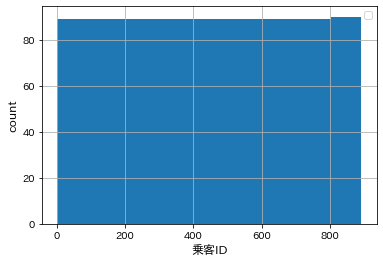

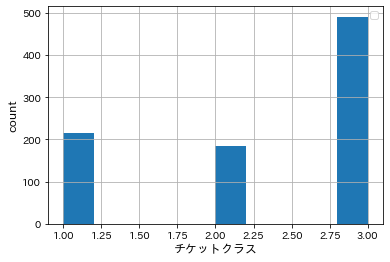

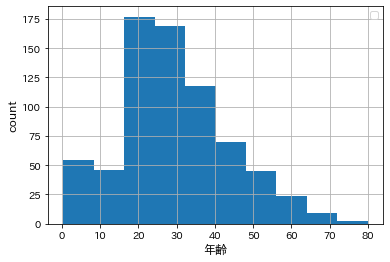

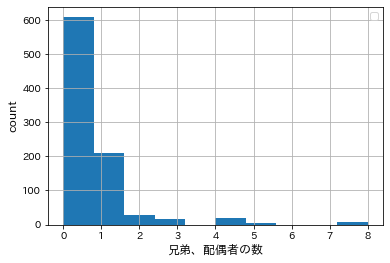

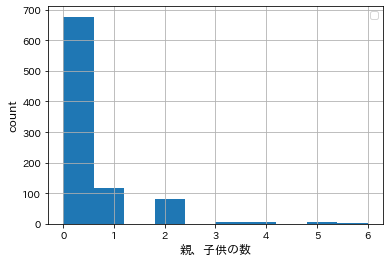

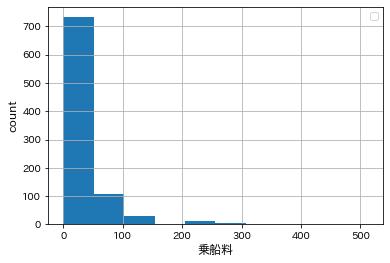

In [120]:
for col in numerical_col_series:
    title = col+"_hist"
    plt.xlabel(col, fontsize=12) #x軸ラベル
    plt.ylabel("count", fontsize=12)#y軸ラベル
    plt.grid(True)      # 目盛線の表示
    
    #plt.title(col, fontsize=20)  # タイトル
    plt.hist(train[col],color = 'tab:blue')
    plt.hist(train_eda[col])
    fname = "1variable_numeric_"+col+"_hist.png"
    #凡例を表示させる最も簡単な方法
    ## plt.plot(x, y, label='label_name')
    ## plt.legend()
    plt.legend()
    plt.savefig(fname)
    plt.show()

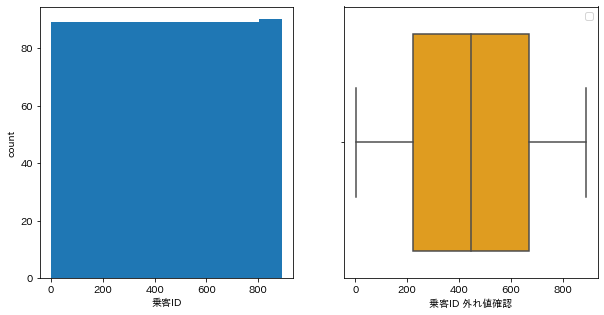

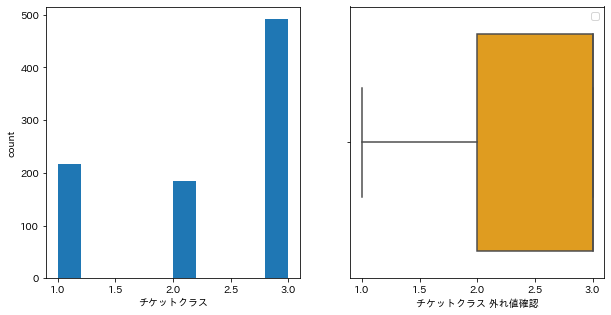

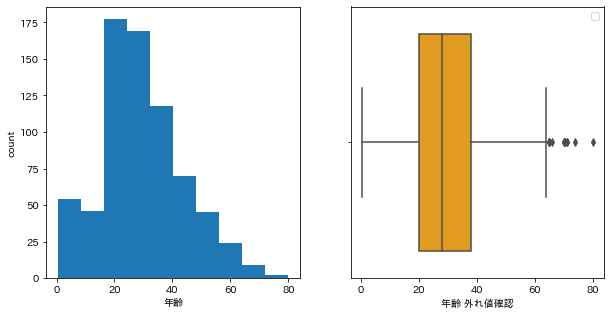

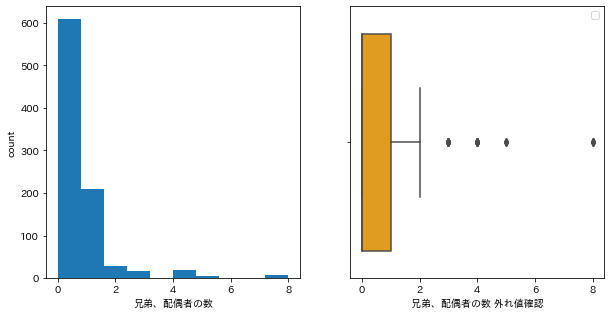

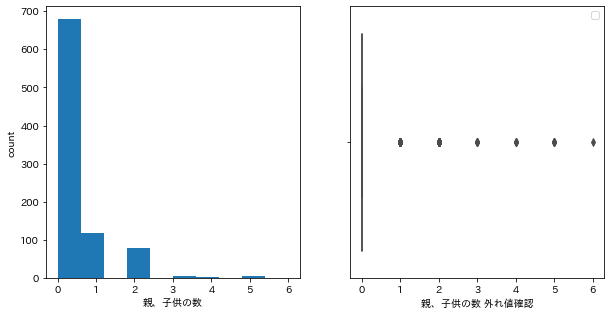

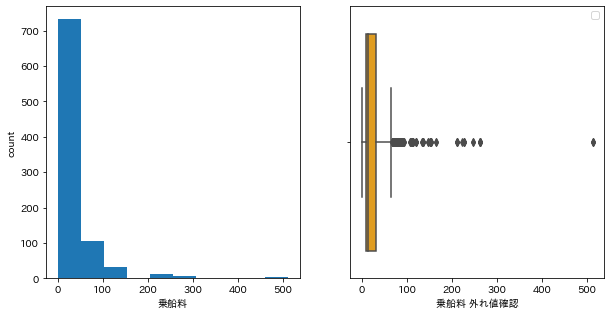

In [121]:
for col in numerical_col_series:
    #col = "Age"
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    
    #axes[0].hist(train[col],color = 'blue')
    axes[0].hist(train_eda[col],color = 'tab:blue')
    axes[0].set_ylabel('count')
    axes[0].set_xlabel(col)
    axes[1] = sns.boxplot(data=train, x=col, color='orange')
    x_label = col + " 外れ値確認"
    axes[1].set_xlabel(x_label)
    plt.legend()
    fname = "1variable_numeric_"+col+"_hist_box.png"
    plt.savefig(fname)
    plt.show()

対数変換

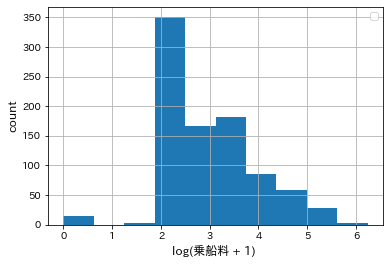

In [122]:
train_eda["乗船料_log"] = np.log(train_eda['乗船料']+1)


plt.hist(train_eda["乗船料_log"])
col = "乗船料_log"
xlabel = "log(乗船料 + 1) "
plt.xlabel(xlabel, fontsize=12) #x軸ラベル
plt.ylabel("count", fontsize=12)#y軸ラベル
plt.grid(True)      # 目盛線の表示

#plt.title(col, fontsize=20)  # タイトル
#plt.hist(train[col],color = 'blue')
plt.hist(train_eda[col],color="tab:blue")
fname = "1variable_numeric_"+col+"_hist.png"
plt.legend()
plt.savefig(fname)
plt.show()

In [123]:
glob.glob("./1variable_*.png")

['./1variable_category_乗船港_hist.png',
 './1variable_numeric_乗船料_hist.png',
 './1variable_numeric_年齢_hist.png',
 './1variable_numeric_乗客ID_hist.png',
 './1variable_category_性別_hist.png',
 './1variable_numeric_乗船料_log_hist.png',
 './1variable_numeric_年齢_hist_box.png',
 './1variable_numeric_チケットクラス_hist.png',
 './1variable_numeric_親、子供の数_hist.png',
 './1variable_numeric_チケットクラス_hist_box.png',
 './1variable_numeric_兄弟、配偶者の数_hist.png',
 './1variable_numeric_親、子供の数_hist_box.png',
 './1variable_numeric_乗客ID_hist_box.png',
 './1variable_numeric_兄弟、配偶者の数_hist_box.png',
 './1variable_numeric_乗船料_hist_box.png']

In [124]:
def zip_glog_key_file(glob_key,zipfile_name):
    targets = []

    for f in sorted(glob.glob(glob_key)):
        targets.append(f)

    targets


    compFile01 = zipfile.ZipFile(zipfile_name, 'w')
    for y in targets:
      compFile01.write(y)
    compFile01.close()

glob_key = "./1variable_*.png"
zipfile_name = "1variable_.zip"

zip_glog_key_file(glob_key,zipfile_name)

# 2変数

In [125]:
train_eda['デッキ'] = train_eda['キャビン番号'].str.get(0) #Cabin（部屋番号）の頭文字（０番目の文字）取得

#print(train_eda.head())

dic['デッキ'] = "Cabin（部屋番号）の頭文字"

col_info_summary = iput_data_summary(data_df=train_eda, header_info_dic=dic)

col_info_summary

,カラム名,カラム概要,レコード数,ユニーク数,欠損(null)数,欠損率,データ型,最小値,平均,最大値
0,乗客ID,乗客のユニークID,891,891,0,0.000,int64,1.00,446.00,891.00
1,生死,"乗客の生死. 0 = 死亡, 1 = 生存",891,2,0,0.000,object,NaN,NaN,NaN
2,チケットクラス,チケットのクラス. 1等席~3等席,891,3,0,0.000,int64,1.00,2.31,3.00
3,乗客名,乗客名,891,891,0,0.000,object,NaN,NaN,NaN
4,性別,male or female,891,2,0,0.000,object,NaN,NaN,NaN
5,年齢,年齢,891,89,177,0.199,float64,0.42,29.70,80.00
6,兄弟、配偶者の数,同乗の兄弟姉妹、配偶者の人数,891,7,0,0.000,int64,0.00,0.52,8.00
7,親、子供の数,同乗の親、子供の人数,891,7,0,0.000,int64,0.00,0.38,6.00
8,チケット番号,チケット番号,891,681,0,0.000,object,NaN,NaN,NaN
9,乗船料,乗船料,891,248,0,0.000,float64,0.00,32.20,512.33


In [126]:
str_col = col_info_summary[col_info_summary["データ型"]=="object"]
str_col_series = str_col["カラム名"]
str_col_series

1         生死
3        乗客名
4         性別
8     チケット番号
10    キャビン番号
11       乗船港
12       デッキ
Name: カラム名, dtype: object

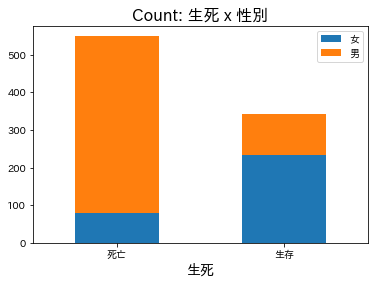

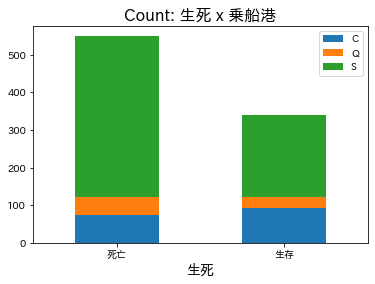

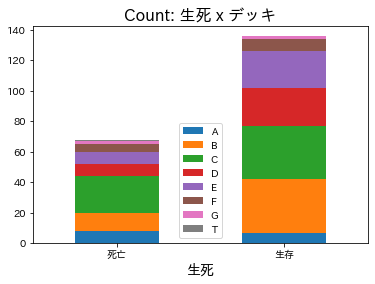

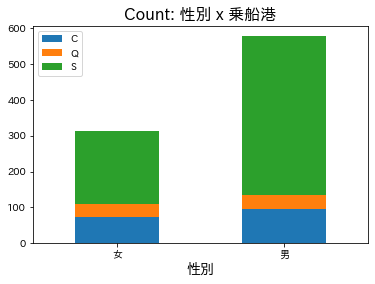

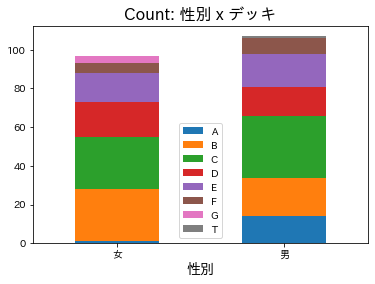

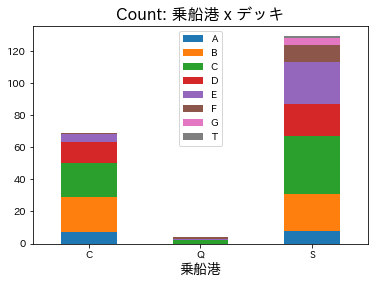

In [127]:
import itertools

target_str_col_series = str_col_series.drop([3,8,10])

for pair in itertools.combinations(target_str_col_series, 2):
    #print(pair)
    #print(pair[0])
    #print(pair[1])
    crossed = pd.crosstab(train_eda[pair[0]],train_eda[pair[1]])
    #print(crossed)
    ## stacked=Trueで積み上げ機能オン
    crossed.plot.bar(stacked=True)
    #title = "Frequency: " + pair[0] + " x " + pair[1]
    title = "Count: " + pair[0] + " x " + pair[1]
    plt.title(title, fontsize=16)  # タイトル
    plt.xlabel(pair[0], fontsize=14) #x軸ラベル
    plt.xticks(rotation=0)
    plt.legend()
    fname="2variable_category_crosstab_" +pair[0] + "_" + pair[1]+".png"
    plt.savefig(fname)
    plt.show()

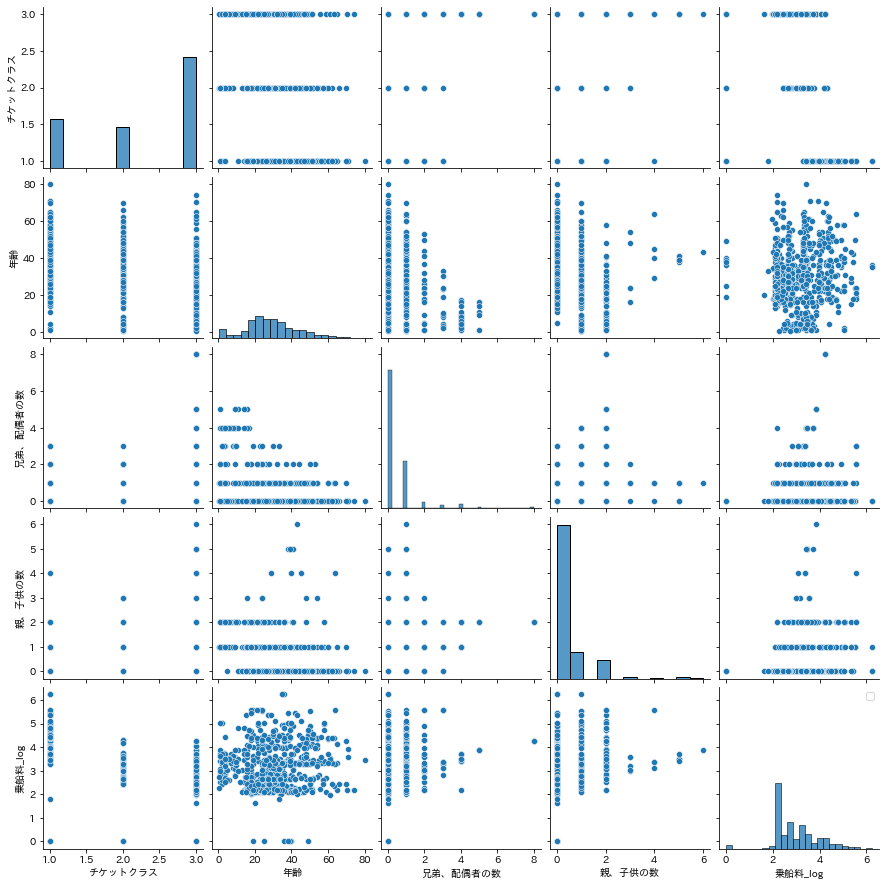

In [128]:
train_eda=train_eda.drop("乗船料",axis=1)
sns.pairplot(train_eda.drop(["乗客ID"],axis=1).select_dtypes(include=[int,float]))

#plt.title("numeric_scatterplot_matrix", fontsize=20)  # タイトル
plt.xlabel(pair[0], fontsize=50) #x軸ラベル
plt.legend()
fname="2variable_numeric_scatterplot_matrix.png"
plt.savefig(fname)
plt.show() 

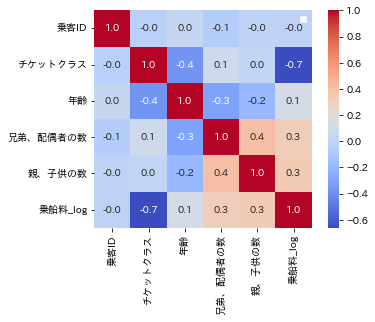

In [129]:
fname="2variable_numeric_heatmap.png"

sns.heatmap(train_eda.select_dtypes(include=[int,float]).corr(),
            annot=True,
            fmt=".1f",
            cmap="coolwarm",
            square=True)
plt.legend()
plt.savefig(fname)
plt.show()

In [130]:
target_str_col_series = str_col_series.drop([3,8,10])
target_str_col_series

1      生死
4      性別
11    乗船港
12    デッキ
Name: カラム名, dtype: object

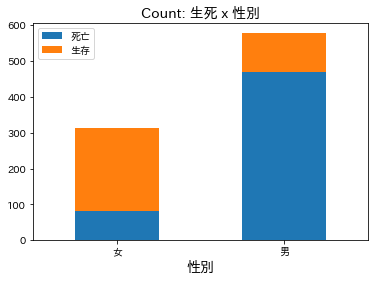

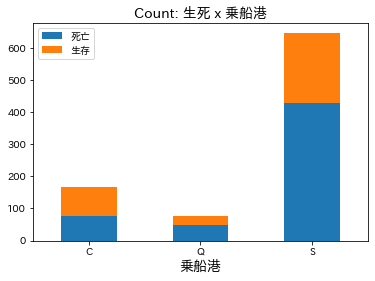

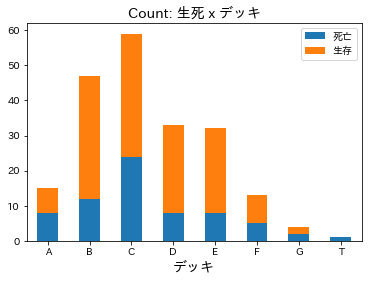

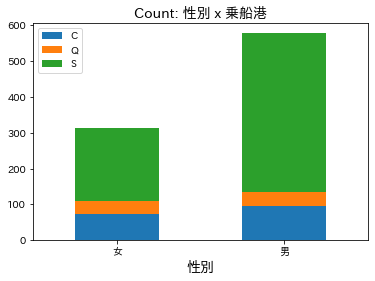

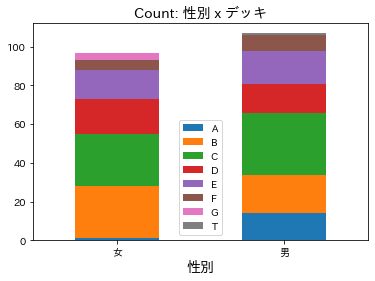

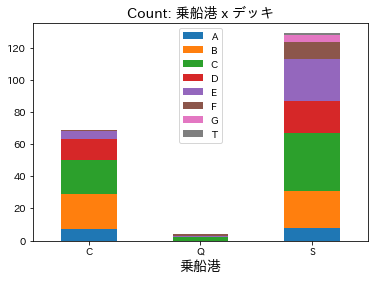

In [131]:
def crossed_bar(df,target_col, target_str_col_series):
    for pair in itertools.combinations(target_str_col_series, 2):
        #print(pair)
        #print(pair[0])
        #print(pair[1])
        if pair[0] == target_col:
            crossed = pd.crosstab(df[pair[1]],df[pair[0]])
            crossed.plot.bar(stacked=True)
            plt.xlabel(pair[1], fontsize=14) #x軸ラベル

        else:
            crossed = pd.crosstab(df[pair[0]],df[pair[1]])
            crossed.plot.bar(stacked=True)
            plt.xlabel(pair[0], fontsize=14) #x軸ラベル

        #title = "Frequency: " + pair[0] + " x " + pair[1]
        title = "Count: " + pair[0] + " x " + pair[1]
        plt.title(title, fontsize=14)  # タイトル

        plt.legend()
        # x軸ラベルを縦に書く（90度回転）
        plt.xticks(rotation=0)
        fname="2variable_category_crosstab_" +pair[0] + "_" + pair[1]+".png"
        plt.savefig(fname)
        plt.show()

crossed_bar(train_eda,target_col, target_str_col_series )

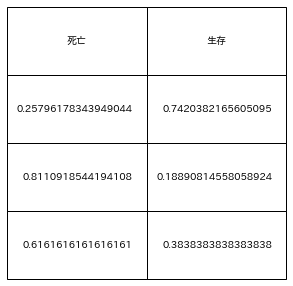

In [132]:
crossed = pd.crosstab(train_eda["性別"],train_eda["生死"],margins=True,normalize='index')


def df_to_save_png(df,w,h,outputPath):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(
        df.values,
        colLabels = df.columns,
        loc = 'center',
        bbox=[0,0,1,1]
    )
    plt.savefig(outputPath)
    plt.show()

df_to_save_png(crossed,5,5,"2variable_Sex-Survived-crossed.png")

In [133]:
crossed

生死,死亡,生存
性別,,
女,0.257962,0.742038
男,0.811092,0.188908
All,0.616162,0.383838


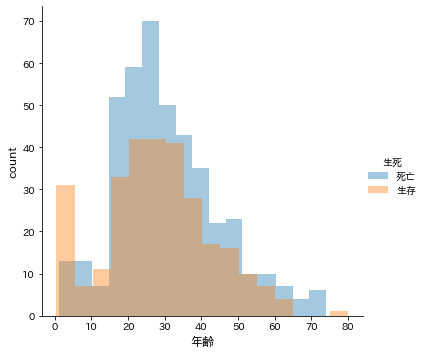

In [134]:
compare_col = "年齢"
#title = "Count: By " +target_col
fname="2variable_" + target_col+"_"+compare_col+"_factgrid.png"
g=sns.FacetGrid(train_eda,hue=target_col,height=5)
g.map(sns.distplot,compare_col,kde=False)
#g.set_titles(template=title)
g.add_legend()
#plt.title(title, fontsize=14,x=0.7,y=0.8)  # タイトル
plt.xlabel(compare_col, fontsize=12) #x軸ラベル
plt.ylabel("count", fontsize=12) #x軸ラベル

plt.savefig(fname)

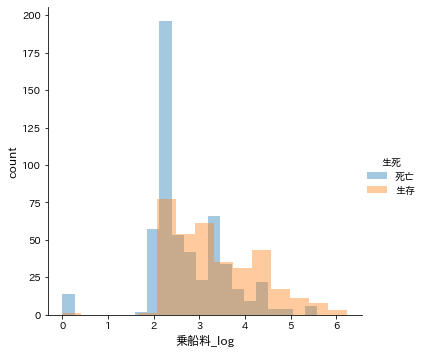

In [135]:
compare_col = "乗船料_log"
#title = "Count: By " +target_col
#title = "Count"
fname="2variable_" + target_col+"_"+compare_col+"_factgrid.png"
g=sns.FacetGrid(train_eda,hue=target_col,height=5)
g.map(sns.distplot,compare_col,kde=False)
#g.set_titles(template=title)
g.add_legend()
#plt.title(title, fontsize=14,x=0.1,y=0.95)  # タイトル
plt.xlabel(compare_col, fontsize=12) #x軸ラベル
plt.ylabel("count", fontsize=12) #x軸ラベル

plt.savefig(fname)

In [136]:
glob_key = "./2variable_*.png"
zipfile_name = "2variable_.zip"
zip_glog_key_file(glob_key,zipfile_name)